# ANN - DERİN Öğrenme - Beton Basınç Dayanımı - Regresyon ve Sınıflandırma

### PROJENİN AMACI:elimizde bulunan veri setinden faydalanarak betonun içindeki companentlerin miktarına deeplearning ile analiz ederek  yeterli dayanıma ulaştığı  süreyi tahmin edeceğiz.
### Kullanılan değerler megapaskal kilogram ve gün olarak farklı birimler içermektedir.




> Blok alıntı ekle


 <img src="https://betonagrega.com/Upload/94224e41-109e-4384-bcee-613ed760eb3d.jpg" alt="Resim Açıklaması" width="670" height="400">



In [62]:
import pandas as pd                      #modelleri import ettik.
pd.set_option("display.max_columns",100) #en fazla 100 kolon göstermek ister isek.
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split   #verileri 2 ye bölmek için import ettik.

import warnings
warnings.filterwarnings('ignore')   #uyarıları görmemek için impor ettik

In [63]:
df=pd.read_excel('/content/Concrete_Data.xls')

### EDA exploratory data analysis-keşifsel veri analizi

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [65]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [66]:
df.isnull().sum()

,0
Cement (component 1)(kg in a m^3 mixture),0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0
Fly Ash (component 3)(kg in a m^3 mixture),0
Water (component 4)(kg in a m^3 mixture),0
Superplasticizer (component 5)(kg in a m^3 mixture),0
Coarse Aggregate (component 6)(kg in a m^3 mixture),0
Fine Aggregate (component 7)(kg in a m^3 mixture),0
Age (day),0
"Concrete compressive strength(MPa, megapascals)",0


In [67]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [68]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength'] #tüm sutun isimlerini bu şekilde güncelliyoruz


In [69]:
df1=df

In [70]:
df['Age'].value_counts()

,count
Age,
28,425
3,134
7,126
56,91
14,62
90,54
100,52
180,26
91,22


In [71]:
df.dtypes

,0
Cement,float64
Slag,float64
FlyAsh,float64
Water,float64
Plasticizer,float64
CoarseAgg,float64
FineAgg,float64
Age,int64
Strength,float64


In [72]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [73]:
df.sample(20)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
680,102.00,153.0,0.00,192.00,0.00,887.00,942.00,28,17.275511
895,260.00,101.0,78.00,171.00,10.00,936.00,763.00,28,49.773272
884,300.00,0.0,120.00,212.00,10.00,878.00,728.00,28,23.835185
140,313.30,262.2,0.00,175.50,8.60,1046.90,611.80,56,64.900376
738,296.00,0.0,0.00,186.00,0.00,1090.00,769.00,7,18.912327
821,322.00,0.0,0.00,203.00,0.00,974.00,800.00,14,20.773912
674,236.00,157.0,0.00,192.00,0.00,972.60,749.10,3,13.565440
266,212.00,0.0,124.78,159.00,7.84,1085.40,799.54,28,38.500340
672,173.00,116.0,0.00,192.00,0.00,946.80,856.80,3,6.940955
776,339.00,0.0,0.00,185.00,0.00,1069.00,754.00,7,21.160018


In [74]:
df[(df['Water'] > 200) & (df['Water'] < 300)]

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
...,...,...,...,...,...,...,...,...,...
1008,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.314271
1010,317.9,0.0,126.5,209.7,5.7,860.5,736.6,28,40.062003
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.225329
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.875165


In [75]:
df.corr()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

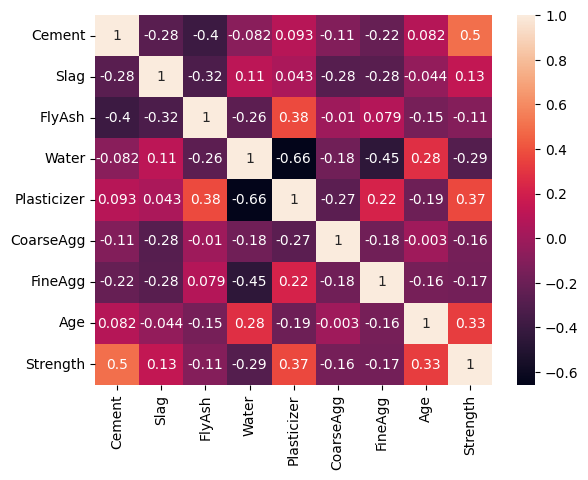

In [76]:
sns.heatmap(df.corr(),annot=True)

In [77]:
abs(df.corr()['Age']).sort_values(ascending=False)

,Age
Age,1.000000
Strength,0.328877
Water,0.277604
Plasticizer,0.192717
FineAgg,0.156094
FlyAsh,0.154370
Cement,0.081947
Slag,0.044246
CoarseAgg,0.003016


In [78]:


import plotly.express as px
px.box(df['Strength'])


In [79]:
px.box(df['Age'])

In [80]:
import plotly.express as px

# Histogram oluşturma
fig = px.histogram(df, x=df['Age'], nbins=10, title='Dağılım Grafiği')
fig.update_layout(xaxis_title='Değerler', yaxis_title='Süre')
fig.show()


In [81]:
df['Strength'].mean()-3*df['Strength'].std(),df['Strength'].mean()+3*df['Strength'].std()

(-14.299201698490236, 85.93487335071744)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [85]:
df= np.log(df+ 1)  # +1 eklemek, 0 değerlerinden kaçınmak için
#Log Dönüşümü: Verilerinizi logaritma alarak dönüştürmek, sağa çarpıklığı azaltabilir. Özellikle pozitif değerler için etkilidir.

In [86]:
x=df.drop('Strength',axis=1)
#x=df[['Water','Strength','Plasticizer','FineAgg','FlyAsh']]
y=df[['Strength']]

In [87]:
from sklearn import preprocessing
x= preprocessing.normalize(x)

In [88]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()



        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [90]:
algo_test(x,y)

,R_Squared,RMSE,MAE
SVR,0.923435,0.145512,0.117257
XGBRegressor,0.909787,0.157950,0.116264
Gradient Boosting,0.908967,0.158665,0.127688
AdaBoost,0.873636,0.186937,0.144373
mlp_regressor,0.870088,0.189543,0.144464
Decision Tree,0.846162,0.206260,0.147681
Linear,0.838885,0.211082,0.171292
Ridge,0.838727,0.211186,0.171162
SGD,0.825000,0.219989,0.174557
KNeighborsRegressor,0.817521,0.224641,0.184737


In [91]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [93]:
model = Sequential()
model.add(Dense(20, activation='relu'))

model.add(Dense(81, activation='relu'))
model.add(Dense(98, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(78, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [94]:
history=model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=.20,verbose=1)


Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 10.0332 - val_loss: 2.0675
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2275 - val_loss: 0.4672
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4337 - val_loss: 0.2948
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2719 - val_loss: 0.1989
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1840 - val_loss: 0.1493
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1317 - val_loss: 0.1296
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1162 - val_loss: 0.1040
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0865 - val_loss: 0.0927
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0766 - val_loss: 0.0784
Epoch 10/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - val_loss: 0.0736
Epoch 11/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0611 - val_loss: 0.0677
Epoch 12/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 81)                  │           1,701 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 98)                  │           8,036 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 120)                 │          11,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 78)                  │           9,438 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │           1,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,510 (384.81 KB)

 Trainable params: 32,836 (128.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,674 (256.54 KB)

In [96]:

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824, 1), (206, 1))

In [97]:

tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [98]:
from sklearn.metrics import r2_score,mean_squared_error

In [99]:
r2_score(y_test,tahmin)

0.8697024072147292

In [100]:
mean_squared_error(y_test,tahmin)**.5

0.1898239808391525

In [101]:
df=df1
#veride manipülasyon uyguladığım için tekrar eski haline getirdim burada

In [102]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [103]:
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


def strength_classifer(x):
    """
    Use numeric data to create a ConcreteClass categorical feature.  This is
    based on "CIP 35 - Testing Compressive Strength of Concrete", National
    Ready Mixed Concrete Association (www.nrmca.org), 2003 & 2014.
    """

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

In [104]:
x=df.drop('ConcreteClass',axis=1)
#x=df[['Water','Strength','Plasticizer','FineAgg','FlyAsh']]
y=df[['ConcreteClass']]


In [105]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial


In [106]:
df['ConcreteClass'].value_counts()

,count
ConcreteClass,
commercial,633
residential,213
non-structural,148
high-strength,36


In [107]:
x=pd.get_dummies(x,drop_first=True)

In [108]:
x= preprocessing.normalize(x)
x=StandardScaler().fit_transform(x)

In [109]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(80, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization ekle
model.add(Dense(4, activation='softmax'))  # Çıkış katmanı

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [111]:
from keras.utils import to_categorical

# Etiketlerinizi one-hot formatına dönüştürün
y = to_categorical(y, num_classes=4)
y.shape

(1030, 4)

In [112]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [113]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32, validation_data=(x_test,y_test), verbose=1)

Epoch 1/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3433 - loss: 1.6316 - val_accuracy: 0.6456 - val_loss: 1.2543
Epoch 2/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5181 - loss: 1.1697 - val_accuracy: 0.6359 - val_loss: 1.1531
Epoch 3/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6312 - loss: 0.9892 - val_accuracy: 0.6748 - val_loss: 1.0631
Epoch 4/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7096 - loss: 0.8411 - val_accuracy: 0.6553 - val_loss: 0.9806
Epoch 5/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6993 - loss: 0.7858 - val_accuracy: 0.6456 - val_loss: 0.9114
Epoch 6/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7356 - loss: 0.7540 - val_accuracy: 0.6553 - val_loss: 0.8740
Epoch 7/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7603 - loss: 0.6854 - val_accuracy: 0.6456 - val_loss: 0.8669
Epoch 8/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7447 - loss: 0.6806 - val_accuracy: 0.6699 - 

In [114]:
x.shape,y.shape

((1030, 9), (1030, 4))

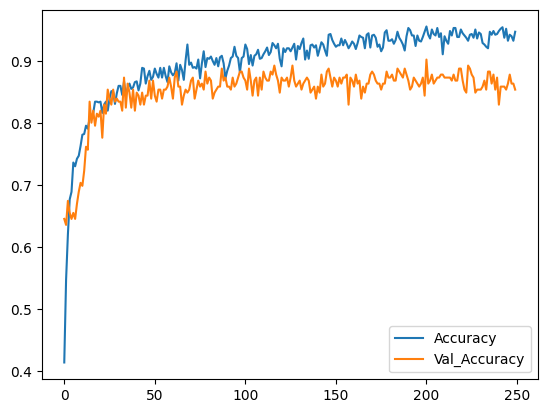

In [115]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

SONUÇ=Beton dayanımını tahmin eden regresyon modeli uyguladık ve eklenen malzemeleri sınıflandırarak bu sınıflara dahil olan verileri tahmin eden bir classification modeli yaptık.